In [19]:
print("Python běží!")

Python běží!


In [4]:
import sys

!{sys.executable} -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not open requirements file: [Errno 2] Adresář nebo soubor neexistuje: 'requirements.txt'


# CVO2
1) Naprogramujte funkci, která rozpozná barvu z detekované oblasti a vrátí 
textový řetězec, uvažujte barvy: bílá, šedá, černá, červená, zelená, modrá, 
žlutá, oranžová, fialová, růžová, (hnědá). Využijte funkci: 
`im2 = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)`

2) V obrázku `cv02_01.bmp` rozpoznejte jednotlivé barvy a rozpoznaný text 
vepište přímo do obrázku. 

```python
cv2 - výpis textu do obrázku
# font
font = cv2.FONT_HERSHEY_SIMPLEX
# org
org = (20, 100)
# fontScale
fontScale = 1 
# color
colT = (0, 0, 0)
# Line thickness of 2 px
im = cv2.putText(im, 'Text', org, font, fontScale, colT, thickness, cv2.LINE_AA)
```

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [57]:
DEBUG = False
VERBOSE = True

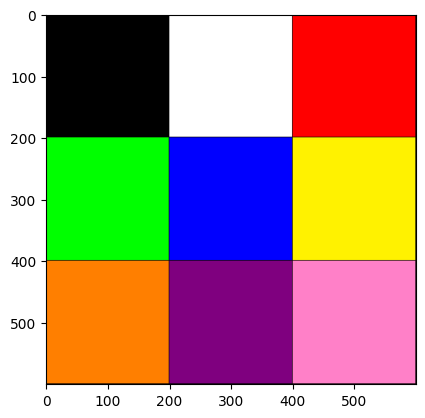

In [25]:
# Zobrazení obrázku
img_file = "cv02_01.bmp"
img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [60]:
# Rozpoznání barev: bílá, šedá, černá, červená, zelená, modrá, žlutá, oranžová, fialová, růžová, (hnědá)
colors = (
    "bila",
    "seda",
    "cerna",
    "cervena",
    "zelena",
    "modra",
    "zluta",
    "oranzova",
    "fialova",
    "ruzova",
    "hneda",
)

colors_hsv = {
    "bila": (0, 0, 255),
    "seda": (0, 0, 127),
    "cerna": (0, 0, 0),
    "cervena": (0, 255, 255),
    "zelena": (60, 255, 255),
    "modra": (120, 255, 255),
    "zluta": (30, 255, 255),
    "oranzova": (15, 255, 255),
    "fialova": (150, 255, 255),
    "ruzova": (165, 255, 255),
    "hneda": (0, 255, 127),
}


def color2text(crop_img: np.ndarray) -> str:
    # to HSV
    brg = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(brg, cv2.COLOR_BGR2HSV)
    # mean color of the image in x,y direction
    mean = cv2.mean(hsv)
    # shape
    if DEBUG:
        print("mean color:", mean[0:3])
    # color
    color = min(colors_hsv, key=lambda x: np.linalg.norm(np.array(colors_hsv[x]) - mean[0:3]))
    return color

In [61]:
print(img.shape)
print(color2text(img[0:200, 0:200]))
print(color2text(img[0:200, 200:400]))
print(color2text(img[0:200, 400:600]))

(600, 600, 3)
cerna
bila
cervena


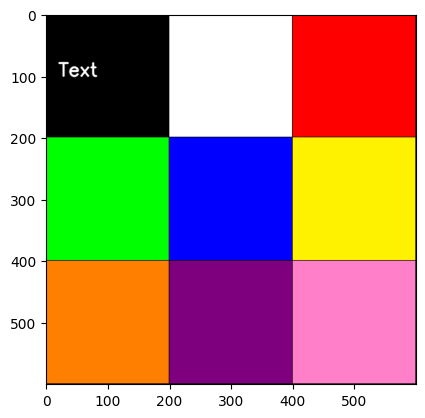

In [62]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# cv2 - výpis textu do obrázku
# font
font = cv2.FONT_HERSHEY_SIMPLEX
# org
org = (20, 100)
# fontScale
fontScale = 1
# color
colT = (0, 0, 0)
colT = (255, 255, 255)
# Line thickness of 2 px
thickness = 2
im_test = cv2.putText(img.copy(), "Text", org, font, fontScale, colT, thickness, cv2.LINE_AA)

plt.imshow(im_test)

Size: 600 600
Cube size: 200 200
Crop coords: 0 199 0 199
Crop coords: 0 199 200 399
Crop coords: 0 199 400 599
Crop coords: 200 399 0 199
Crop coords: 200 399 200 399
Crop coords: 200 399 400 599
Crop coords: 400 599 0 199
Crop coords: 400 599 200 399
Crop coords: 400 599 400 599


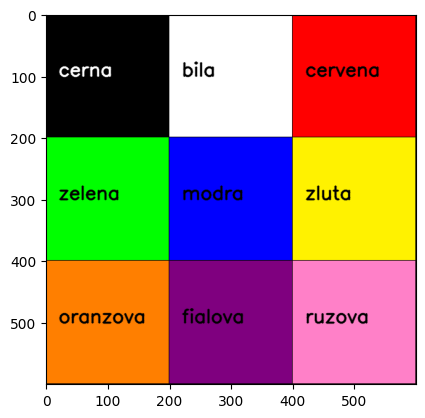

In [63]:
rows, cols = 3, 3
img_color_names = img.copy()
y, x = img.shape[0:2]
cube_size_x = int(x/cols)
cube_size_y = int(y/rows)
if VERBOSE:
    print("Size:", x,y)
    print("Cube size:", cube_size_x, cube_size_y)

for i in range(rows):
    for j in range(cols):
        x_min = i*cube_size_x
        x_max = i*cube_size_x+cube_size_x-1
        y_min = j*cube_size_y
        y_max = j*cube_size_y+cube_size_y-1
        if VERBOSE:
            print("Crop coords:", x_min, x_max, y_min, y_max)
        crop_img = img[y_min:y_max, x_min:x_max]
        if DEBUG:
            print(crop_img.shape)
        # print text
        # color
        if i == 0 and j == 0:
            colT = (255, 255, 255)
        else:
            colT = (0, 0, 0)
        color_name = color2text(crop_img)
        text_coords = (x_min+20, y_min+cube_size_y//2)
        img_color_names = cv2.putText(img_color_names, color_name, text_coords, font, fontScale, colT, thickness, cv2.LINE_AA)
		
plt.imshow(img_color_names)